## 2.2 迷路とエージェントを実装

### import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

matplotlibで迷路を描画する

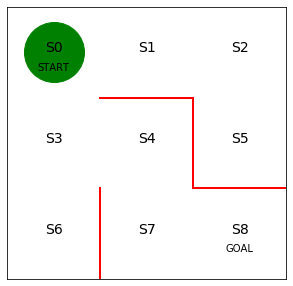

In [19]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1], [0,1], color='red', linewidth=2)
plt.plot([1,2], [2,2], color='red', linewidth=2)
plt.plot([2,2], [2,1], color='red', linewidth=2)
plt.plot([2,3], [1,1], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)

plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

初期の方策を決めるためのパラメータ$\theta_0$を設定する。行は状態0~7を示し、列は移動方向で<上,下,左,右>のいずれかを表す。

In [20]:
# [上,下,左,右] np.nanはいけない方向(壁)
# s8はゴールなので、方策は無し

theta_0 = np.array([[np.nan, 1, 1, np.nan], #s0
                    [np.nan, 1, np.nan, 1], #s1
                    [np.nan, np.nan, 1, 1], #s2
                    [1, 1, 1, np.nan], #s3
                    [np.nan, np.nan, 1, 1], #s4
                    [1, np.nan, np.nan, np.nan], #s5
                    [1, np.nan, np.nan, np.nan], #s6
                    [1, 1, np.nan, np.nan], #s7
                   ])

パラメータ$\theta_0$を変換して方策$\pi_{\theta}(s,a)$を求める。

今回は単純な変換方法を採用する。つまり、進める方向に対して$\theta$の値を割合にすることで確率にする。
この変換を行うための関数を`simple_theta2pi`と命名する。

In [24]:
# 方策パラメータthetaを行動方策piに変換

def simple_theta2pi(theta):
    [m, n] = theta.shape
    pi = np.zeros((m,n))
    
    for i in range(0,m):
        pi[i,:] = theta[i,:]/np.nansum(theta[i,:]) #各要素に対して割合を計算
        
    pi = np.nan_to_num(pi) #nanは0に変換
    
    return pi

`simple_theta2pi`を実行し、$\theta_0$から初期方策$\pi_{\theta_0}(s,a)$を求める

In [25]:
pi_0 = simple_theta2pi(theta_0)

In [26]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [27]:
def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s,:])
    
    if next_direction == 'up': # 上の時は状態の数値が3小さくなる
        s_next = s - 3 
    elif next_direction == 'right': # 右の時は状態の数値が1大きくなる
        s_next = s + 1
    elif next_direction == 'down': # 下の時は状態の数値が3大きくなる
        s_next = s + 3
    elif next_direction == 'left': # 左の時は状態の数値が1小さくなる
        s_next = s - 1
        
    return s_next

In [32]:
def goal_maze(pi):
    s = 0
    s_history = [0]
    
    while(1):
        next_s = get_next_s(pi, s)
        s_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return s_history

In [57]:
s_history = goal_maze(pi_0)

In [60]:
s_history

print(s_history)
print("total number of step:", str(len(s_history)-1))

[0, 3, 4, 3, 0, 1, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 2, 1, 0, 3, 6, 3, 0, 3, 0, 3, 4, 7, 8]
total number of step: 28


In [61]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    state = state_history[i]
    x = state%3 + 0.5
    y = 2.5 - int(state/3)
    line.set_data(x,y)
    return(line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=len(s_history), interval=200, repeat=False)

HTML(anim.to_jshtml())